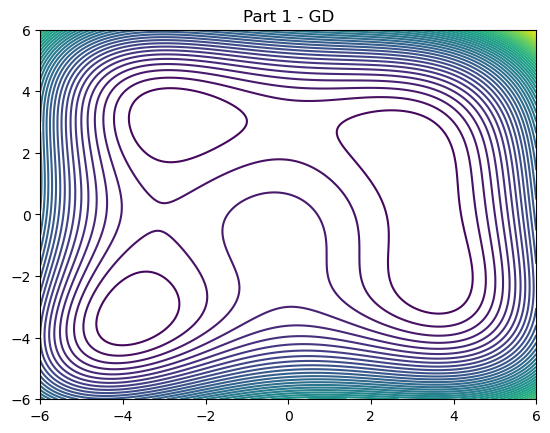

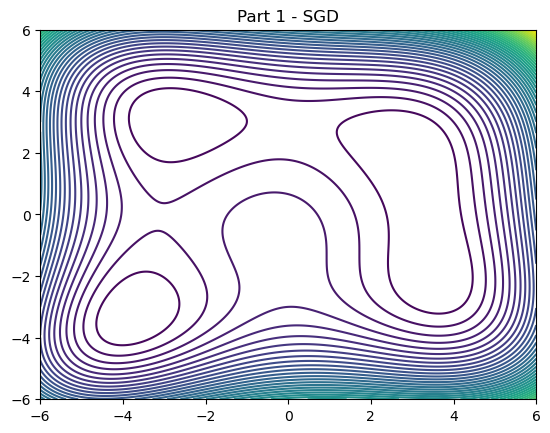

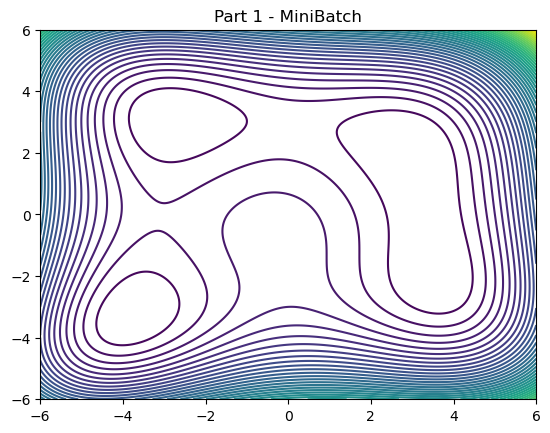

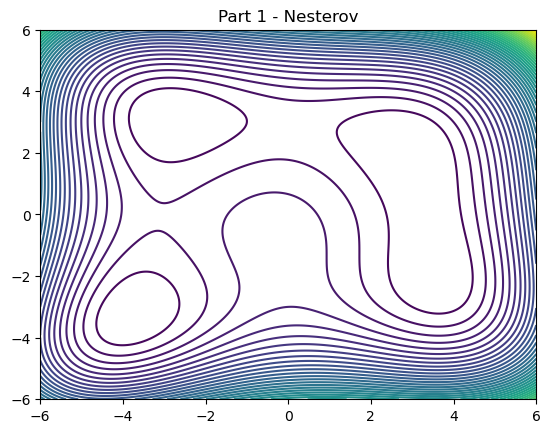

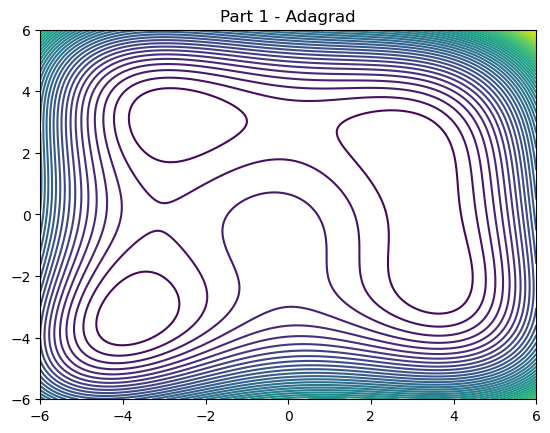

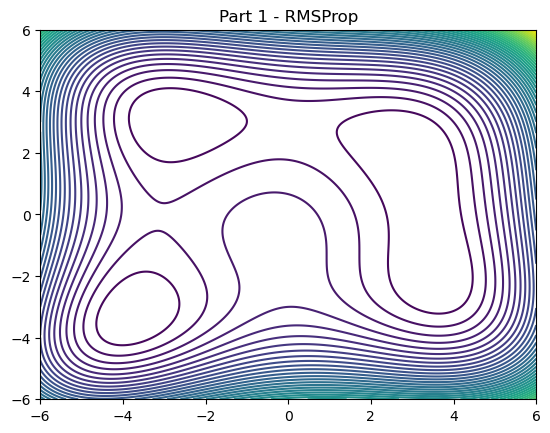

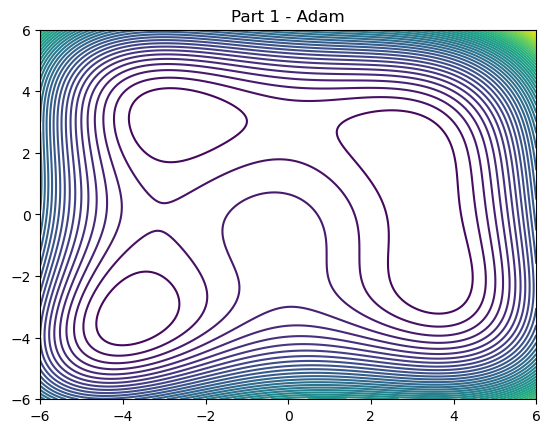

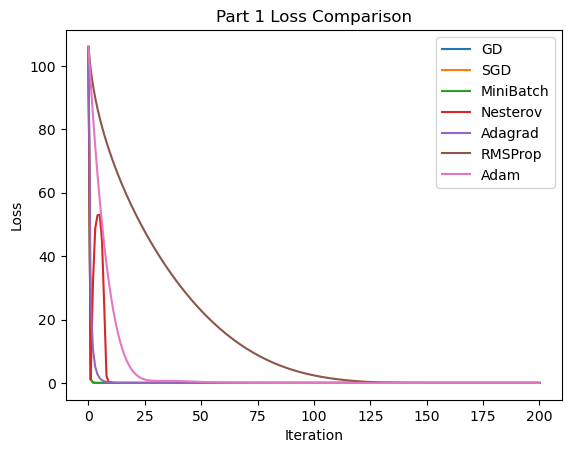

Exception: No CSV file found in the archive folder.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os

############################################
# PART 1 – HIMMELBLAU FUNCTION
############################################

def himmelblau(w):
    w1, w2 = w
    return (w1**2 + w2 - 11)**2 + (w1 + w2**2 - 7)**2

def grad_himmelblau(w):
    w1, w2 = w
    df_dw1 = 4*w1*(w1**2 + w2 - 11) + 2*(w1 + w2**2 - 7)
    df_dw2 = 2*(w1**2 + w2 - 11) + 4*w2*(w1 + w2**2 - 7)
    return np.array([df_dw1, df_dw2])

############################################
# OPTIMIZERS
############################################

def gradient_descent(w_init, grad, func, lr=0.01, iterations=200):
    w = w_init.copy()
    traj, loss = [w.copy()], [func(w)]
    for _ in range(iterations):
        w -= lr * grad(w)
        traj.append(w.copy())
        loss.append(func(w))
    return np.array(traj), np.array(loss)

def stochastic_gd(w_init, grad, func, lr=0.01, iterations=200):
    w = w_init.copy()
    traj, loss = [w.copy()], [func(w)]
    for _ in range(iterations):
        noise = np.random.normal(0, 0.1, size=2)
        w -= lr * (grad(w) + noise)
        traj.append(w.copy())
        loss.append(func(w))
    return np.array(traj), np.array(loss)

def mini_batch_gd(w_init, grad, func, lr=0.01, iterations=200):
    w = w_init.copy()
    traj, loss = [w.copy()], [func(w)]
    for _ in range(iterations):
        noise = np.random.normal(0, 0.05, size=2)
        w -= lr * (grad(w) + noise)
        traj.append(w.copy())
        loss.append(func(w))
    return np.array(traj), np.array(loss)

def nesterov(w_init, grad, func, lr=0.01, momentum=0.9, iterations=200):
    w = w_init.copy()
    v = np.zeros_like(w)
    traj, loss = [w.copy()], [func(w)]
    for _ in range(iterations):
        lookahead = w - momentum * v
        g = grad(lookahead)
        v = momentum * v + lr * g
        w -= v
        traj.append(w.copy())
        loss.append(func(w))
    return np.array(traj), np.array(loss)

def adagrad(w_init, grad, func, lr=0.5, eps=1e-8, iterations=200):
    w = w_init.copy()
    G = np.zeros_like(w)
    traj, loss = [w.copy()], [func(w)]
    for _ in range(iterations):
        g = grad(w)
        G += g**2
        w -= lr * g / (np.sqrt(G) + eps)
        traj.append(w.copy())
        loss.append(func(w))
    return np.array(traj), np.array(loss)

def rmsprop(w_init, grad, func, lr=0.01, beta=0.9, eps=1e-8, iterations=200):
    w = w_init.copy()
    E = np.zeros_like(w)
    traj, loss = [w.copy()], [func(w)]
    for _ in range(iterations):
        g = grad(w)
        E = beta * E + (1-beta) * g**2
        w -= lr * g / (np.sqrt(E) + eps)
        traj.append(w.copy())
        loss.append(func(w))
    return np.array(traj), np.array(loss)

def adam(w_init, grad, func, lr=0.05, beta1=0.9, beta2=0.999, eps=1e-8, iterations=200):
    w = w_init.copy()
    m = np.zeros_like(w)
    v = np.zeros_like(w)
    traj, loss = [w.copy()], [func(w)]
    for t in range(1, iterations+1):
        g = grad(w)
        m = beta1*m + (1-beta1)*g
        v = beta2*v + (1-beta2)*(g**2)
        m_hat = m/(1-beta1**t)
        v_hat = v/(1-beta2**t)
        w -= lr * m_hat/(np.sqrt(v_hat)+eps)
        traj.append(w.copy())
        loss.append(func(w))
    return np.array(traj), np.array(loss)

############################################
# VISUALIZATION
############################################

def animate_contour(func, trajectory, title):
    w1 = np.linspace(-6, 6, 400)
    w2 = np.linspace(-6, 6, 400)
    W1, W2 = np.meshgrid(w1, w2)
    Z = np.array([[func([x,y]) for x in w1] for y in w2])

    fig, ax = plt.subplots()
    ax.contour(W1, W2, Z, levels=50)
    ax.set_title(title)
    line, = ax.plot([], [], 'r-o')

    def update(i):
        line.set_data(trajectory[:i,0], trajectory[:i,1])
        return line,

    ani = FuncAnimation(fig, update, frames=len(trajectory), interval=40)
    plt.show()

def plot_loss(loss_dict, title):
    plt.figure()
    for name, loss in loss_dict.items():
        plt.plot(loss, label=name)
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title(title)
    plt.show()

############################################
# RUN PART 1
############################################

w_init = np.array([-4.0, 4.0])

optimizers_part1 = {
    "GD": gradient_descent(w_init, grad_himmelblau, himmelblau),
    "SGD": stochastic_gd(w_init, grad_himmelblau, himmelblau),
    "MiniBatch": mini_batch_gd(w_init, grad_himmelblau, himmelblau),
    "Nesterov": nesterov(w_init, grad_himmelblau, himmelblau),
    "Adagrad": adagrad(w_init, grad_himmelblau, himmelblau),
    "RMSProp": rmsprop(w_init, grad_himmelblau, himmelblau),
    "Adam": adam(w_init, grad_himmelblau, himmelblau)
}

loss_part1 = {}

for name, (traj, loss) in optimizers_part1.items():
    loss_part1[name] = loss
    animate_contour(himmelblau, traj, f"Part 1 - {name}")

plot_loss(loss_part1, "Part 1 Loss Comparison")

############################################
# PART 2 – LOGISTIC REGRESSION
############################################

folder_path = r"C:\Users\23adsb56\Downloads\archive"
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

if len(files) == 0:
    raise Exception("No CSV file found in the archive folder.")

file_path = os.path.join(folder_path, files[0])
print("Using dataset:", file_path)

data = pd.read_csv(file_path)

X = data.iloc[:, 0:2].values
y = data.iloc[:, 2].values

def sigmoid(z):
    return 1/(1+np.exp(-z))

def logistic_loss(w):
    z = X @ w
    p = sigmoid(z)
    return -np.mean(y*np.log(p+1e-8)+(1-y)*np.log(1-p+1e-8))

def grad_logistic(w):
    z = X @ w
    p = sigmoid(z)
    return X.T @ (p - y) / len(y)

optimizers_part2 = {
    "GD": gradient_descent(w_init, grad_logistic, logistic_loss),
    "SGD": stochastic_gd(w_init, grad_logistic, logistic_loss),
    "MiniBatch": mini_batch_gd(w_init, grad_logistic, logistic_loss),
    "Nesterov": nesterov(w_init, grad_logistic, logistic_loss),
    "Adagrad": adagrad(w_init, grad_logistic, logistic_loss),
    "RMSProp": rmsprop(w_init, grad_logistic, logistic_loss),
    "Adam": adam(w_init, grad_logistic, logistic_loss)
}

loss_part2 = {}

for name, (traj, loss) in optimizers_part2.items():
    loss_part2[name] = loss
    animate_contour(logistic_loss, traj, f"Part 2 - {name}")

plot_loss(loss_part2, "Part 2 Loss Comparison")


In [4]:
import os

folder_path = r"C:\Users\23adsb56\Downloads\archive"

for root, dirs, files in os.walk(folder_path):
    print("Folder:", root)
    print("Files:", files)
    print("-"*40)


Folder: C:\Users\23adsb56\Downloads\archive
Files: ['t10k-images.idx3-ubyte', 't10k-labels.idx1-ubyte', 'train-images.idx3-ubyte', 'train-labels.idx1-ubyte']
----------------------------------------
Folder: C:\Users\23adsb56\Downloads\archive\t10k-images-idx3-ubyte
Files: ['t10k-images-idx3-ubyte']
----------------------------------------
Folder: C:\Users\23adsb56\Downloads\archive\t10k-labels-idx1-ubyte
Files: ['t10k-labels-idx1-ubyte']
----------------------------------------
Folder: C:\Users\23adsb56\Downloads\archive\train-images-idx3-ubyte
Files: ['train-images-idx3-ubyte']
----------------------------------------
Folder: C:\Users\23adsb56\Downloads\archive\train-labels-idx1-ubyte
Files: ['train-labels-idx1-ubyte']
----------------------------------------


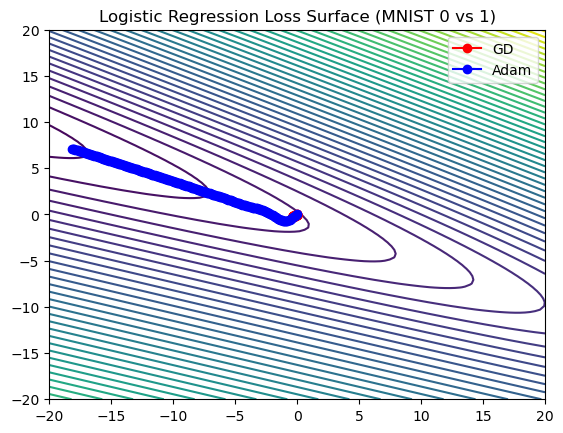

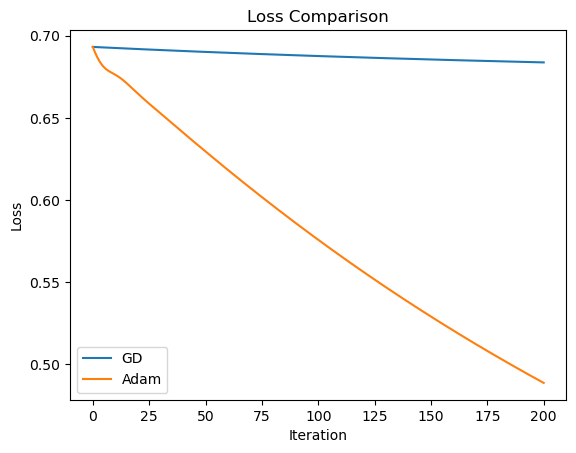

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import os

# LOAD MNIST DATA (IDX FORMAT)

def load_images(filepath):
    with open(filepath, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(num, rows * cols)
        return images

def load_labels(filepath):
    with open(filepath, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

folder = r"C:\Users\23adsb56\Downloads\archive"

X_train = load_images(os.path.join(folder, "train-images.idx3-ubyte"))
y_train = load_labels(os.path.join(folder, "train-labels.idx1-ubyte"))


# CREATE BINARY DATASET (0 vs 1)


mask = (y_train == 0) | (y_train == 1)
X = X_train[mask]
y = y_train[mask]

# Create 2 features
feature1 = np.mean(X, axis=1) / 255.0
feature2 = np.std(X, axis=1) / 255.0

X = np.column_stack((feature1, feature2))
y = y.astype(float)


# LOGISTIC REGRESSION


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss(w):
    z = X @ w
    p = sigmoid(z)
    return -np.mean(y*np.log(p+1e-8)+(1-y)*np.log(1-p+1e-8))

def grad_logistic(w):
    z = X @ w
    p = sigmoid(z)
    return X.T @ (p - y) / len(y)


# OPTIMIZERS


def gradient_descent(w_init, lr=0.1, iterations=200):
    w = w_init.copy()
    traj, loss = [w.copy()], [logistic_loss(w)]
    for _ in range(iterations):
        w -= lr * grad_logistic(w)
        traj.append(w.copy())
        loss.append(logistic_loss(w))
    return np.array(traj), np.array(loss)

def adam(w_init, lr=0.1, iterations=200):
    w = w_init.copy()
    m = np.zeros_like(w)
    v = np.zeros_like(w)
    beta1, beta2 = 0.9, 0.999
    eps = 1e-8
    traj, loss = [w.copy()], [logistic_loss(w)]
    for t in range(1, iterations+1):
        g = grad_logistic(w)
        m = beta1*m + (1-beta1)*g
        v = beta2*v + (1-beta2)*(g**2)
        m_hat = m/(1-beta1**t)
        v_hat = v/(1-beta2**t)
        w -= lr * m_hat/(np.sqrt(v_hat)+eps)
        traj.append(w.copy())
        loss.append(logistic_loss(w))
    return np.array(traj), np.array(loss)


# RUN OPTIMIZATION


w_init = np.array([0.0, 0.0])

traj_gd, loss_gd = gradient_descent(w_init)
traj_adam, loss_adam = adam(w_init)


# CONTOUR PLOT


w1 = np.linspace(-20, 20, 100)
w2 = np.linspace(-20, 20, 100)
W1, W2 = np.meshgrid(w1, w2)

Z = np.zeros_like(W1)
for i in range(len(w1)):
    for j in range(len(w2)):
        Z[j,i] = logistic_loss(np.array([W1[j,i], W2[j,i]]))

plt.contour(W1, W2, Z, levels=50)
plt.plot(traj_gd[:,0], traj_gd[:,1], 'r-o', label="GD")
plt.plot(traj_adam[:,0], traj_adam[:,1], 'b-o', label="Adam")
plt.legend()
plt.title("Logistic Regression Loss Surface (MNIST 0 vs 1)")
plt.show()


# LOSS CURVE


plt.plot(loss_gd, label="GD")
plt.plot(loss_adam, label="Adam")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.show()
